<h2 style='color:blue' align="center">Support Vector Machine Using Python Sklearn</h2>

## The Data
We will be using the famous [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). 

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
flowers=load_iris()

In [2]:
dir(flowers)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
flowers.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [4]:
flowers.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df=pd.DataFrame(flowers.data,columns=flowers.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target']=flowers.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
flowers.target_names 
#'setosa': 0, 'versicolor': 1, 'virginica' : 2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
flowers.target_names[0]

'setosa'

In [12]:
flowers.target_names[1]

'versicolor'

In [13]:
flowers.target_names[2]

'virginica'

**Generating one column with the help of another column**


In [14]:
df['Flower_Name']=df.target.apply(lambda x:flowers.target_names[x])

In [15]:
df.columns=['sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'target', 'Flower_Name']

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,Flower_Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
df.Flower_Name.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [18]:
df_setosa=df[df.target==0]

In [19]:
df_versicolor=df[df.target==1]

In [20]:
df_virginica=df[df.target==2]

# Since it is a 2D plot, hence using only 2 features

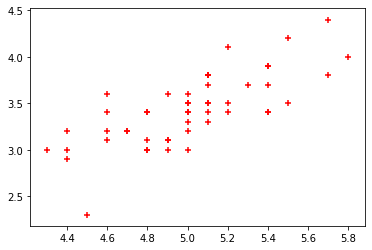

In [21]:
plt.scatter(x=df_setosa.sepal_length,y=df_setosa.sepal_width,marker='+',color='red')

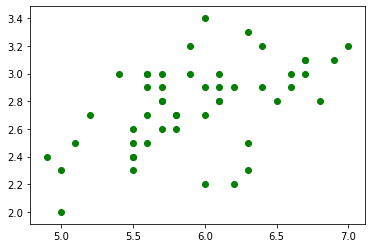

In [22]:
plt.scatter(x=df_versicolor.sepal_length,y=df_versicolor.sepal_width,marker='o',color='green')

# Sepal length vs Sepal Width (Setosa vs Versicolor)

You can see that there is a clear distinction b/w the 2 types of flowers

Text(0, 0.5, 'Sepal Width')

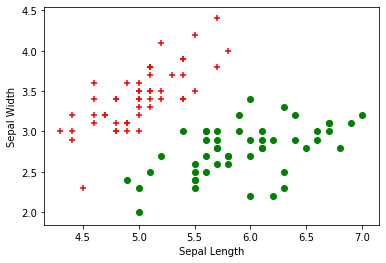

In [23]:
plt.scatter(x=df_setosa.sepal_length,y=df_setosa.sepal_width,marker='+',color='red')
plt.scatter(x=df_versicolor.sepal_length,y=df_versicolor.sepal_width,marker='o',color='green')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Petal length vs Pepal Width (Setosa vs Versicolor)

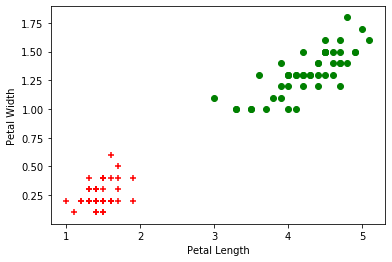

In [24]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(x=df_setosa.petal_length,y=df_setosa.petal_width,marker='+',color='red')
plt.scatter(x=df_versicolor.petal_length,y=df_versicolor.petal_width,marker='o',color='green')


When we are going to train our model, we are going to use all 4 features

In [25]:
X=df.drop(columns=['target','Flower_Name'])

In [26]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
Y=df['target']

In [28]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [30]:
len(X_train)

120

In [31]:
len(X_test)

30

In [32]:
from sklearn.svm import SVC
model = SVC()

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [35]:
model.score(X_test,y_test)

1.0

**Tune parameters**

**Regularization(C)**

In [40]:
from sklearn.svm import SVC
model_C = SVC(C=100)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

**Gamma**

In [41]:
from sklearn.svm import SVC
model_G = SVC(gamma=100)
model_G.fit(X_train, y_train)
model_G.score(X_test, y_test)

0.5

**Kernel**

In [42]:
##Types of kernel available: 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
model_linear_kernal.score(X_test, y_test)

0.9666666666666667

# Problem 2
Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits)

Objective:

1. Measure accuracy of the model using different kernels such as rbf and linear.
2. Tune the model further using regularization and gamma parameters and try to come up with highest accurancy score



In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()

In [45]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [46]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [47]:
digits.target[67]

6

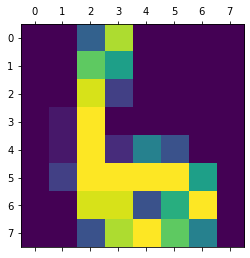

In [48]:
plt.matshow(digits.images[67])

In [49]:
digits.target[67]

6

In [50]:
digits.data[67]

array([ 0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,
        0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  1.,
       16.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2.,  7.,  4.,  0.,
        0.,  0.,  3., 16., 16., 16., 16.,  9.,  0.,  0.,  0., 15., 15.,
        4., 10., 16.,  0.,  0.,  0.,  4., 14., 16., 12.,  7.,  0.])

In [51]:
M=pd.DataFrame(digits.data)

In [52]:
M.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [53]:
N=pd.DataFrame(digits.target,columns=['target'])

In [54]:
N.head()

,target
0,0
1,1
2,2
3,3
4,4


In [55]:
len(digits.data)

1797

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(M,N,test_size=0.2)

In [57]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [58]:
model.score(X_test,y_test)

0.5305555555555556

In [59]:
from sklearn.svm import SVC
model1 = SVC(kernel='linear')
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.9805555555555555

**Linear kenel works better**